# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("previsao_de_renda.csv")

In [3]:
df.drop(columns=["Unnamed: 0", "mau", "index", ], inplace=True)
df["data_ref"] = pd.to_datetime(df["data_ref"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   sexo                   15000 non-null  object        
 2   posse_de_veiculo       15000 non-null  bool          
 3   posse_de_imovel        15000 non-null  bool          
 4   qtd_filhos             15000 non-null  int64         
 5   tipo_renda             15000 non-null  object        
 6   educacao               15000 non-null  object        
 7   estado_civil           15000 non-null  object        
 8   tipo_residencia        15000 non-null  object        
 9   idade                  15000 non-null  int64         
 10  tempo_emprego          12466 non-null  float64       
 11  qt_pessoas_residencia  15000 non-null  float64       
 12  renda                  15000 non-null  float64       
dtypes

In [5]:
df["data_ref"]

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
14995   2016-03-01
14996   2016-03-01
14997   2016-03-01
14998   2016-03-01
14999   2016-03-01
Name: data_ref, Length: 15000, dtype: datetime64[ns]

In [6]:
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [7]:
df["data_ref"].value_counts()




data_ref
2015-01-01    1000
2015-02-01    1000
2015-03-01    1000
2015-04-01    1000
2015-05-01    1000
2015-06-01    1000
2015-07-01    1000
2015-08-01    1000
2015-09-01    1000
2015-10-01    1000
2015-11-01    1000
2015-12-01    1000
2016-01-01    1000
2016-02-01    1000
2016-03-01    1000
Name: count, dtype: int64

Nesse ponto vou trablhar apenas com os dados do ano de 2015

In [8]:
df_raw = df.loc[df["data_ref"].dt.year == 2015]

In [9]:
df_raw["mes"] = None

C:\Users\carlo\AppData\Local\Temp\ipykernel_10412\139284462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw["mes"] = None


In [10]:
datas = ["janeiro", "fevereiro", "março", "abril", "maio", "junho", "julho", "agosto", "setembro", "outubro", "novembro", "dezembro"]

for i in range(0,12):
    df_raw.loc[df_raw["data_ref"].dt.month == i+1, "mes"] = datas[i]
    

In [11]:
df_raw.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mes
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24,janeiro
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14,janeiro
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98,janeiro
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69,janeiro
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37,janeiro


In [12]:
df_raw["mes"].value_counts()

mes
janeiro      1000
fevereiro    1000
março        1000
abril        1000
maio         1000
junho        1000
julho        1000
agosto       1000
setembro     1000
outubro      1000
novembro     1000
dezembro     1000
Name: count, dtype: int64

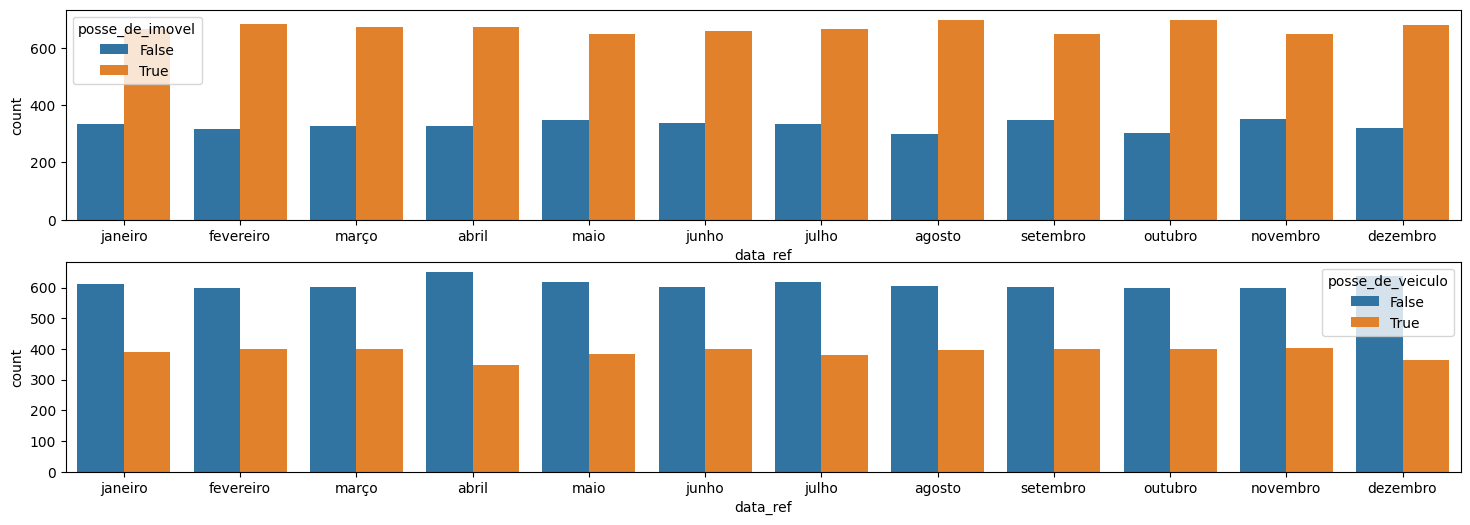

In [13]:
datas = ["janeiro", "fevereiro", "março", "abril", "maio", "junho", "julho", "agosto", "setembro", "outubro", "novembro", "dezembro"]
fig, ax = plt.subplots(2,1 ,figsize=(18,6))

sns.countplot(ax = ax[0], x="data_ref", data=df_raw, hue= "posse_de_imovel" )
ax[0].tick_params(axis="x", rotation = 30)
ax[0].set_xticklabels(datas, rotation=0)

sns.countplot(ax = ax[1], x="data_ref", data=df_raw, hue= "posse_de_veiculo" )
ax[1].tick_params(axis="x", rotation = 30)
ax[1].set_xticklabels(datas, rotation=0)

plt.show()

#### Nada significativo

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [14]:
df_raw.groupby(["mes", "posse_de_imovel"])[["renda"]].mean()

renda
mes       posse_de_imovel             
abril     False            4494.560703
          True             4618.899762
agosto    False            4042.180867
          True             4518.255843
dezembro  False            4545.099313
          True             4239.859309
fevereiro False            4274.337886
          True             4857.689561
janeiro   False            4466.039429
          True             4675.891424
julho     False            4243.200419
          True             4853.494550
junho     False            4646.622507
          True             4659.397428
maio      False            4427.137937
          True             4740.824531
março     False            4476.432049
          True             4683.978915
novembro  False            4553.667322
          True             4555.076641
outubro   False            4148.296457
          True             5040.773023
setembro  False            4410.488281
          True             4616.643641

In [15]:
imovel = df_raw.groupby(["mes", "posse_de_imovel"])[["renda"]].mean()

In [16]:
veiculo = df_raw.groupby(["mes", "posse_de_veiculo"])[["renda"]].mean()

In [17]:
imovel = imovel.reindex(datas, level=0)
veiculo = veiculo.reindex(datas, level=0)

In [18]:
imovel.head(3)

renda
mes       posse_de_imovel             
janeiro   False            4466.039429
          True             4675.891424
fevereiro False            4274.337886

In [19]:
veiculo.head(3)

renda
mes       posse_de_veiculo             
janeiro   False             4465.324141
          True              4826.986272
fevereiro False             4547.635867

In [22]:
true_imovel = list()
false_imovel = list()
true_veiculo = list()
false_veiculo = list()

In [23]:
for i in datas:
    true_imovel.append(float(imovel.loc[(i,True )]))
    false_imovel.append(float(imovel.loc[(i, False)]))
    # -------------veiculo--------------------------------
    false_veiculo.append(float(veiculo.loc[(i, False)]))
    true_veiculo.append(float(imovel.loc[(i,True )]))

C:\Users\carlo\AppData\Local\Temp\ipykernel_10412\1952732011.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  true_imovel.append(float(imovel.loc[(i,True )]))
C:\Users\carlo\AppData\Local\Temp\ipykernel_10412\1952732011.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  false_imovel.append(float(imovel.loc[(i, False)]))
C:\Users\carlo\AppData\Local\Temp\ipykernel_10412\1952732011.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  false_veiculo.append(float(veiculo.loc[(i, False)]))
C:\Users\carlo\AppData\Local\Temp\ipykernel_10412\1952732011.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
 

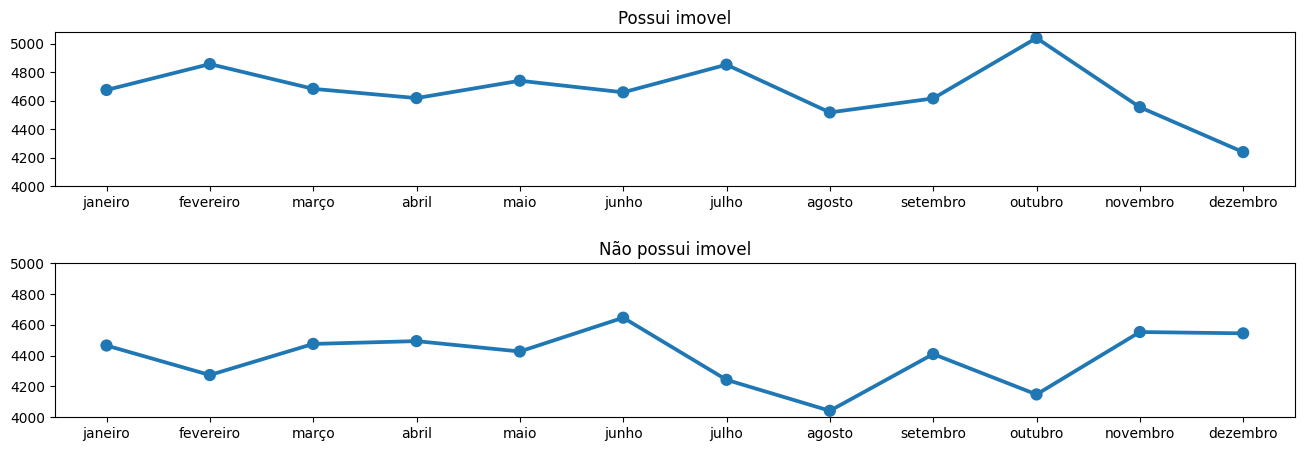

In [24]:
fig, axes = plt.subplots(2,1, figsize=(16,5))

sns.pointplot(ax = axes[0], x=datas, y=true_imovel)
axes[0].set_title("Possui imovel")
axes[0].set_yticks([i for i in range(4000, 5200, 200)])

sns.pointplot(ax = axes[1], x=datas, y=false_imovel)
axes[1].set_title("Não possui imovel")
axes[1].set_yticks([i for i in range(4000, 5200, 200)])

fig.subplots_adjust(hspace=0.5)

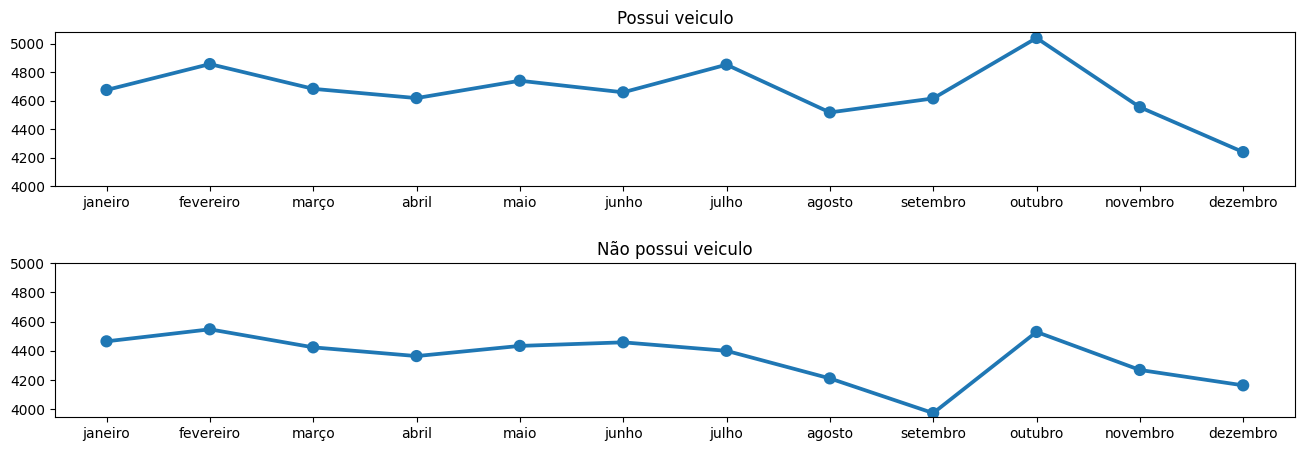

In [26]:
fig, axes = plt.subplots(2,1, figsize=(16,5))

sns.pointplot(ax = axes[0], x=datas, y=true_veiculo)
axes[0].set_title("Possui veiculo")
axes[0].set_yticks([i for i in range(4000, 5200, 200)])

sns.pointplot(ax = axes[1], x=datas, y=false_veiculo)
axes[1].set_title("Não possui veiculo")
axes[1].set_yticks([i for i in range(4000, 5200, 200)])

fig.subplots_adjust(hspace=0.5)

temos casos com rendas um pouco acima da média, mas nada significativo a ponto de ser um outlier